In [49]:
import sys
sys.path.append("..")

In [50]:
from datasets.bosch_connector_loader import BoschConnectorPinsDataset
from feature_extractors.auto_encoder import AutoEncoderFeatureExtractor
import random
import torch
import numpy as np
from PIL import Image
from matplotlib.pyplot import imshow, bar
import cv2
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [51]:
def visualize_patches(special_patches):
	upper = np.concatenate(special_patches[:7], axis=1)
	lower = np.concatenate(special_patches[7:], axis=1)
	img = np.concatenate([lower, upper], axis=0)
	img = cv2.normalize(img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
	imshow(Image.fromarray(img))

In [52]:
dataset = BoschConnectorPinsDataset(patch_resize=(20,20))
featureExtractor = AutoEncoderFeatureExtractor(
	model_store_path="../models/complexAutoencoder.pt", dataset=dataset, batch_size=2, num_epochs=150, learning_rate=0.001)

pos_image_paths, neg_image_paths = dataset.test_data_paths()

example_image, example_patches = dataset.data_for_path(neg_image_paths[random.randint(0, len(neg_image_paths))])


In [53]:
reconstructed_patches = []
features = []
for patch in example_patches:
	img = patch.flatten().astype(np.float32)
	img = torch.tensor(img)
	img = img.to(device)
	img = img.view(-1, len(img))
	reconstructed = featureExtractor.forward(img)
	reconstructed = reconstructed.view(20, 20)
	reconstructed = reconstructed.cpu().detach().numpy()
	reconstructed_patches.append(reconstructed)
	features.append(featureExtractor.extract_feature(patch))

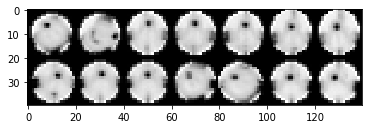

In [54]:
visualize_patches(example_patches)

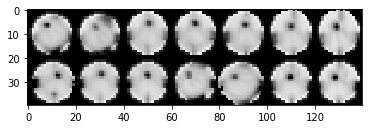

In [55]:
visualize_patches(reconstructed_patches)

In [56]:
bar(range(14), features)



<BarContainer object of 14 artists>